# I. General process

## 1.Read file

In [2]:
'''
hue_test = 'https://raw.githubusercontent.com/Nguyen-Van-Truong-Khoa/PTTK_FINAL_PROJECT/main/rainfall_hue_2020_2022.csv'
import pandas as pd
dataset1 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")
dataset1

dataset2 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")
dataset2
'''

'\nhue_test = \'https://raw.githubusercontent.com/Nguyen-Van-Truong-Khoa/Group-12---ProjectCS4273.N12.1/main/hue_test.csv\'\nimport pandas as pd\ndataset1 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")\ndataset1\n\ndataset2 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")\ndataset2\n'

In [3]:
#import library
import pandas as pd 

#import dataset
dataset1 = pd.read_csv("../Dataset/rainfall_hue_2020_2022.csv", index_col = "date", parse_dates= True).asfreq("D")
dataset1

dataset2 = pd.read_csv("../Dataset/rainfall_hue_2020_2022.csv", index_col = "date", parse_dates= True).asfreq("D")
dataset2

,rain,Unnamed: 2
date,,
2020-01-01,19.0,NaN
2020-01-02,26.9,NaN
2020-01-03,3.5,NaN
2020-01-04,0.7,NaN
2020-01-05,0.2,NaN
...,...,...
2022-12-25,0.0,NaN
2022-12-26,0.0,NaN
2022-12-27,2.2,NaN


## 2. Process data

### .

In [4]:
# Take needed column
df1 = dataset1[['rain']]
df1

df2  = dataset2[['rain']]
df2

,rain
date,
2020-01-01,19.0
2020-01-02,26.9
2020-01-03,3.5
2020-01-04,0.7
2020-01-05,0.2
...,...
2022-12-25,0.0
2022-12-26,0.0
2022-12-27,2.2


In [5]:
#Check Nan value
import numpy as np
print(df2[np.isnan(df2["rain"])].index)
#print(df2[pd.isnull(df2["rain"])].index)

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')


## Split data

In [6]:
ratio_train = 0.7
train = df2[:int(len(df2)*ratio_train)]
test = df2[int(len(df2)*ratio_train):]
print(train)
print(test)
train1 = df2[:int(len(df2)*ratio_train)]
test1 = df2[int(len(df2)*ratio_train):]
print(train1)
print(test1)

            rain
date            
2020-01-01  19.0
2020-01-02  26.9
2020-01-03   3.5
2020-01-04   0.7
2020-01-05   0.2
...          ...
2022-01-30   0.0
2022-01-31   1.0
2022-02-01   0.0
2022-02-02   0.7
2022-02-03   1.2

[765 rows x 1 columns]
            rain
date            
2022-02-04   4.0
2022-02-05  11.4
2022-02-06   2.0
2022-02-07   0.0
2022-02-08   0.0
...          ...
2022-12-25   0.0
2022-12-26   0.0
2022-12-27   2.2
2022-12-28   5.0
2022-12-29  26.1

[329 rows x 1 columns]
            rain
date            
2020-01-01  19.0
2020-01-02  26.9
2020-01-03   3.5
2020-01-04   0.7
2020-01-05   0.2
...          ...
2022-01-30   0.0
2022-01-31   1.0
2022-02-01   0.0
2022-02-02   0.7
2022-02-03   1.2

[765 rows x 1 columns]
            rain
date            
2022-02-04   4.0
2022-02-05  11.4
2022-02-06   2.0
2022-02-07   0.0
2022-02-08   0.0
...          ...
2022-12-25   0.0
2022-12-26   0.0
2022-12-27   2.2
2022-12-28   5.0
2022-12-29  26.1

[329 rows x 1 columns]


## 3. Visualizing dataset

<function matplotlib.pyplot.show(close=None, block=None)>

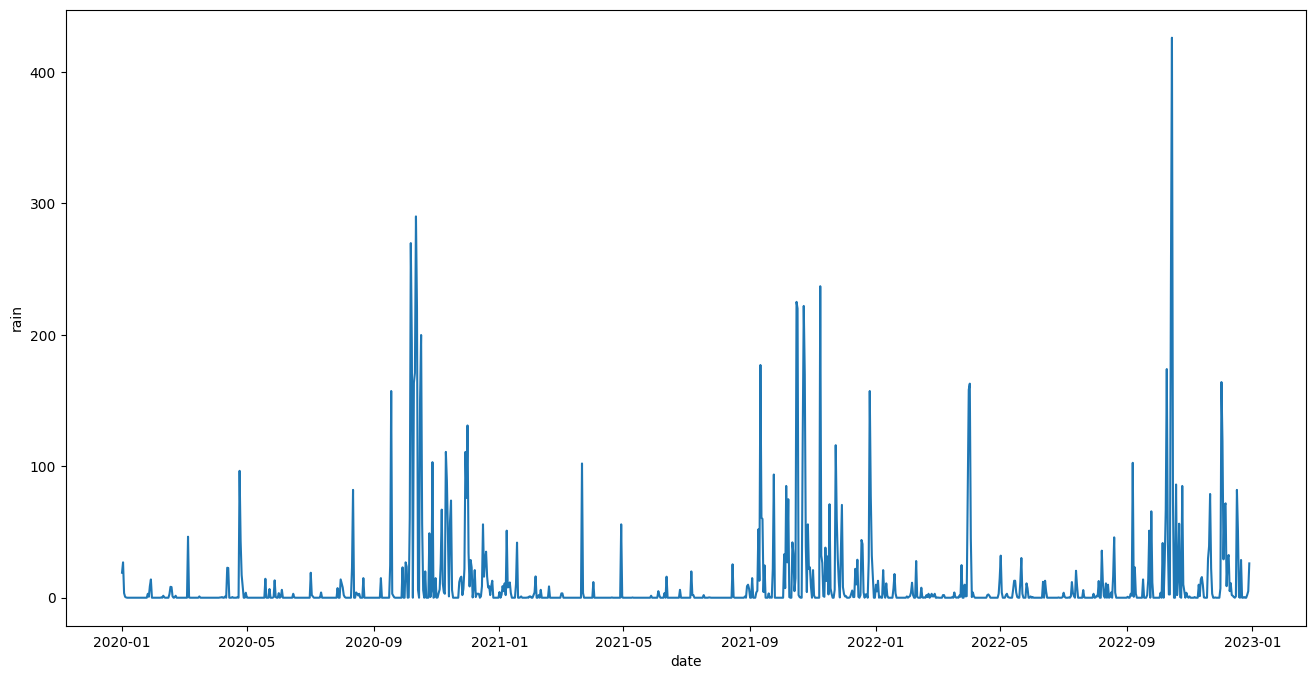

In [7]:
#import lib
import matplotlib.pyplot as plt
#set size of plot frame
plt.figure(figsize=(16, 8))
# labeling
plt.xlabel('date')
plt.ylabel('rain')
# plotting
plt.plot(df2)
plt.show

## Visualizing train and test data

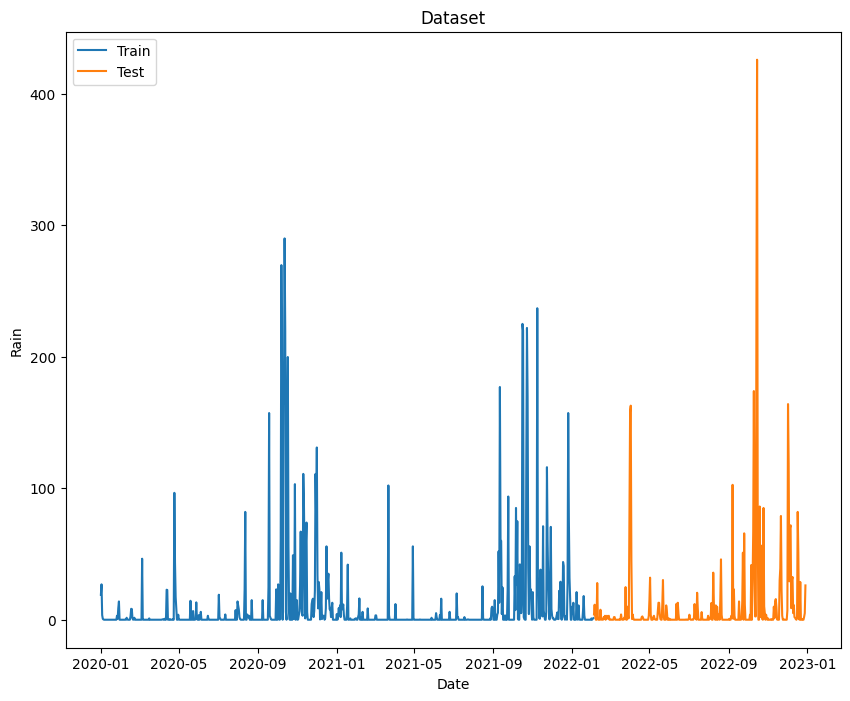

In [8]:
#import lib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Dataset')
plt.xlabel('Date')
plt.ylabel('Rain')
plt.legend()
plt.show()

# II. Linear regression

## 1. Proccess input data

### .

In [29]:
#import library
from sklearn.linear_model import LinearRegression
#create new input x column
df1['days_from_start'] = (df1.index - df1.index[0]).days
df1

,rain,days_from_start
date,,
2020-01-01,19.0,0
2020-01-02,26.9,1
2020-01-03,3.5,2
2020-01-04,0.7,3
2020-01-05,0.2,4
...,...,...
2022-12-25,0.0,1089
2022-12-26,0.0,1090
2022-12-27,2.2,1091


In [10]:
train1 = df1[:int(len(df1)*ratio_train)]
test1 = df1[int(len(df1)*ratio_train):]
print(train1)
print(test1)

            rain  days_from_start
date                             
2020-01-01  19.0                0
2020-01-02  26.9                1
2020-01-03   3.5                2
2020-01-04   0.7                3
2020-01-05   0.2                4
...          ...              ...
2022-01-30   0.0              760
2022-01-31   1.0              761
2022-02-01   0.0              762
2022-02-02   0.7              763
2022-02-03   1.2              764

[765 rows x 2 columns]
            rain  days_from_start
date                             
2022-02-04   4.0              765
2022-02-05  11.4              766
2022-02-06   2.0              767
2022-02-07   0.0              768
2022-02-08   0.0              769
...          ...              ...
2022-12-25   0.0             1089
2022-12-26   0.0             1090
2022-12-27   2.2             1091
2022-12-28   5.0             1092
2022-12-29  26.1             1093

[329 rows x 2 columns]


In [11]:
#Pull out the column
x_train = train1['days_from_start'].values.reshape(-1, 1)
y_train = train1['rain'].values

x_test = test1['days_from_start'].values.reshape(-1, 1)
y_test = test1['rain'].values

<function matplotlib.pyplot.show(close=None, block=None)>

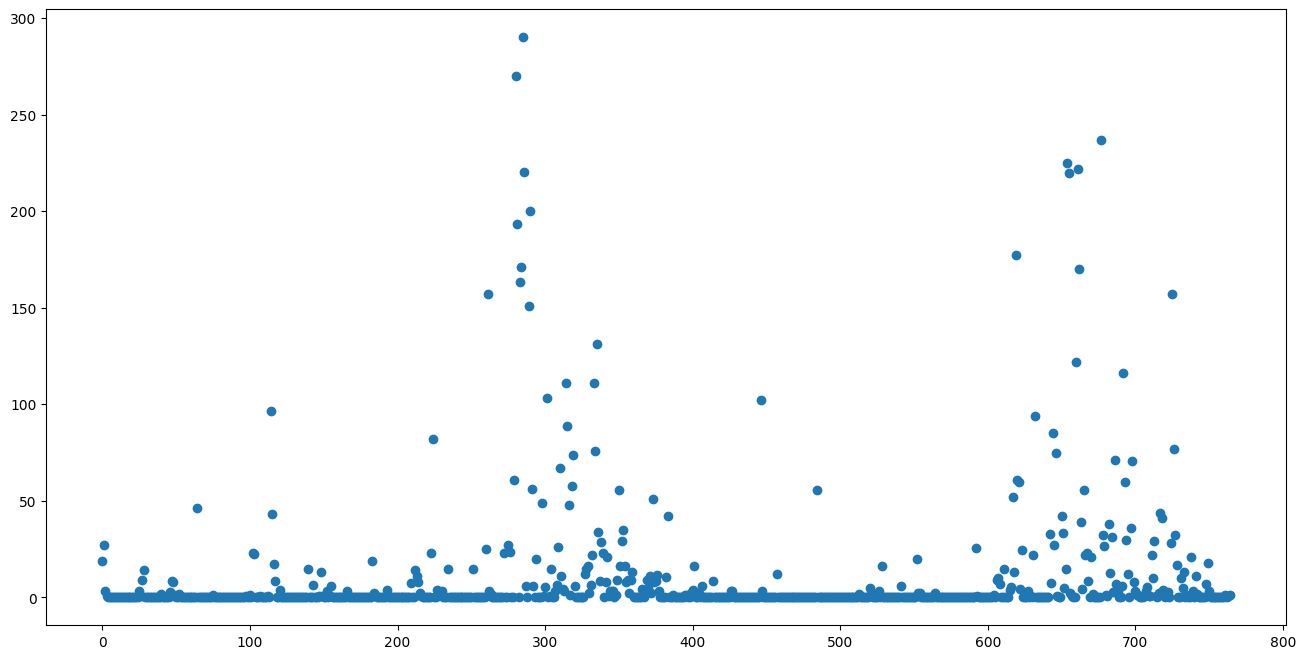

In [12]:
plt.figure(figsize=(16, 8))
plt.scatter(x_train, y_train)
#plt.plot(x_train, y_train)
plt.show

## 2. Train model

In [14]:
#import library
from sklearn import linear_model
#train model
model = linear_model.LinearRegression().fit(x_train, y_train)

### .

In [15]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 4.662104131469823
slope: [0.01511306]


In [16]:
print('r='+str(model.score(x_train, y_train)))

r=0.010014906834182158


## 3. Plot model

### .

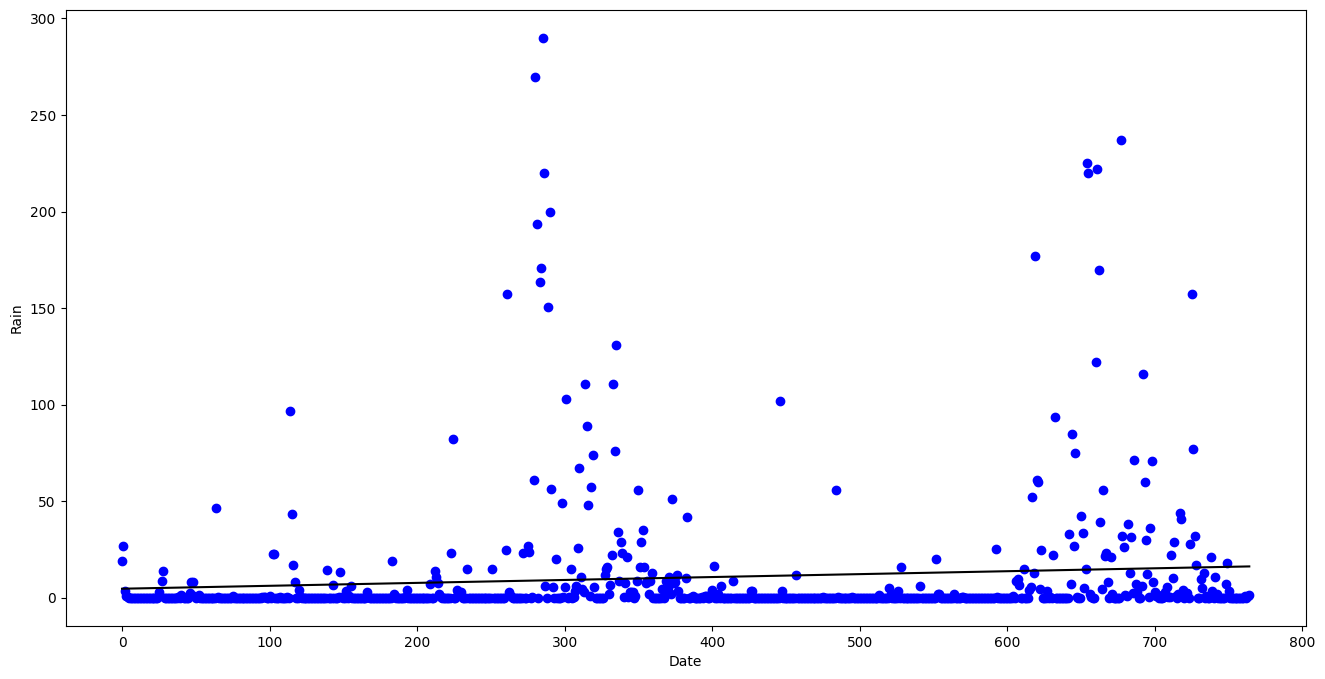

In [17]:
# Plot the regression line superimposed on the training dataset
plt.figure(figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('Rain')
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, model.predict(x_train), color = 'black')
plt.show()

### .

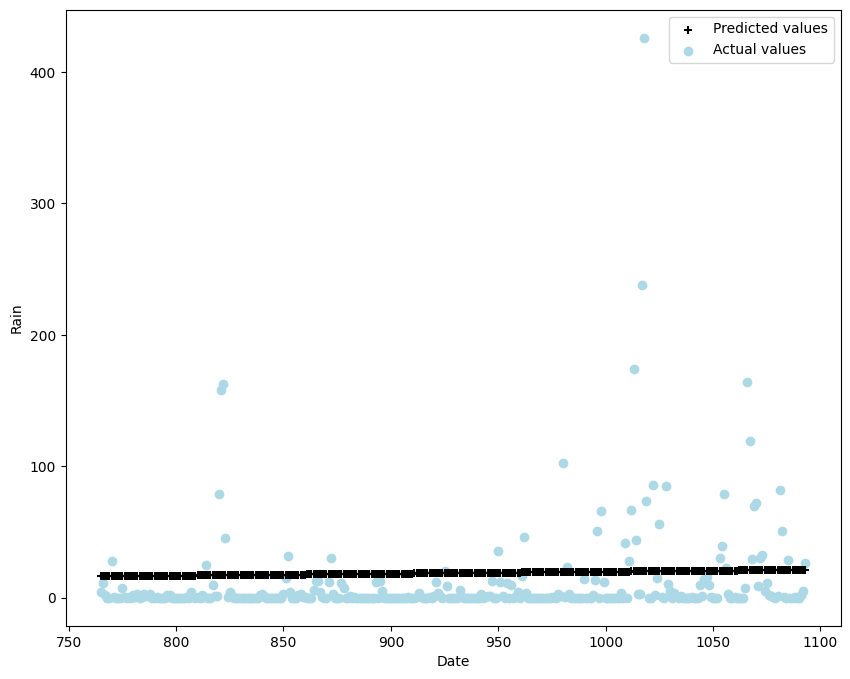

In [18]:
# Plot the predicted and actual values for the holdout dataset
plt.figure(figsize=(10, 8))
plt.xlabel('Date')
plt.ylabel('Rain')
actuals = plt.scatter(x_test, y_test, marker='o', color = 'lightblue', label='Actual values')
predicted = plt.scatter(x_test, model.predict(x_test), marker='+', color = 'black', label='Predicted values')
plt.legend(handles=[predicted, actuals])
plt.show()

# 4. Result evaluation

In [19]:
actual = y_test
predict =model.predict(x_test)

In [20]:
#MAE
MAE = 0
for i in range(len(actual)):
    MAE = MAE + abs(actual[i] - predict[i])
MAE = MAE / len(actual)
print(MAE)

21.65913784185646


In [21]:
#RMSE
RMSE = 0
for i in range(len(actual)):
    RMSE = RMSE + (actual[i] - predict[i])**2
RMSE = np.sqrt(RMSE / len(actual))
print(RMSE)

36.50270718798607


## 3. predicted value from 1/1/2023 to 30/1/2023

### .

In [22]:
'''# Calculate distance from day to the fisrt day in dataset
import numpy as np
from datetime import date
Date = np.array([[30,12,2022],
        [31,12,2022],
        [1,1,2023],
        [2,1,2023]])
print(dataset1.index[0].day,dataset1.index[0].month,dataset1.index[0].year)
d1 = date(dataset1.index[0].year,dataset1.index[0].month,dataset1.index[0].day)
ranges = (int)((Date.size)/3)
#calculate
for i in range(ranges):
    d0 = date(Date[i][2], Date[i][1], Date[i][0])
    delta = abs(d0 - d1)
    print(model.predict([[delta.days]]))'''


1 1 2020
[21.19579482]
[21.21090789]
[21.22602095]
[21.24113401]


### .

In [27]:
from datetime import date
d1 = date(dataset1.index[0].year,dataset1.index[0].month,dataset1.index[0].day)
for i in range(1,31):
    d0 = date(2023,1,i)
    delta = abs(d0 - d1)
    print(model.predict([[delta.days]]))

[21.22602095]
[21.24113401]
[21.25624708]
[21.27136014]
[21.2864732]
[21.30158626]
[21.31669933]
[21.33181239]
[21.34692545]
[21.36203852]
[21.37715158]
[21.39226464]
[21.4073777]
[21.42249077]
[21.43760383]
[21.45271689]
[21.46782996]
[21.48294302]
[21.49805608]
